A304_SRO_NGO_Hall_150K_p1T_to_n1T

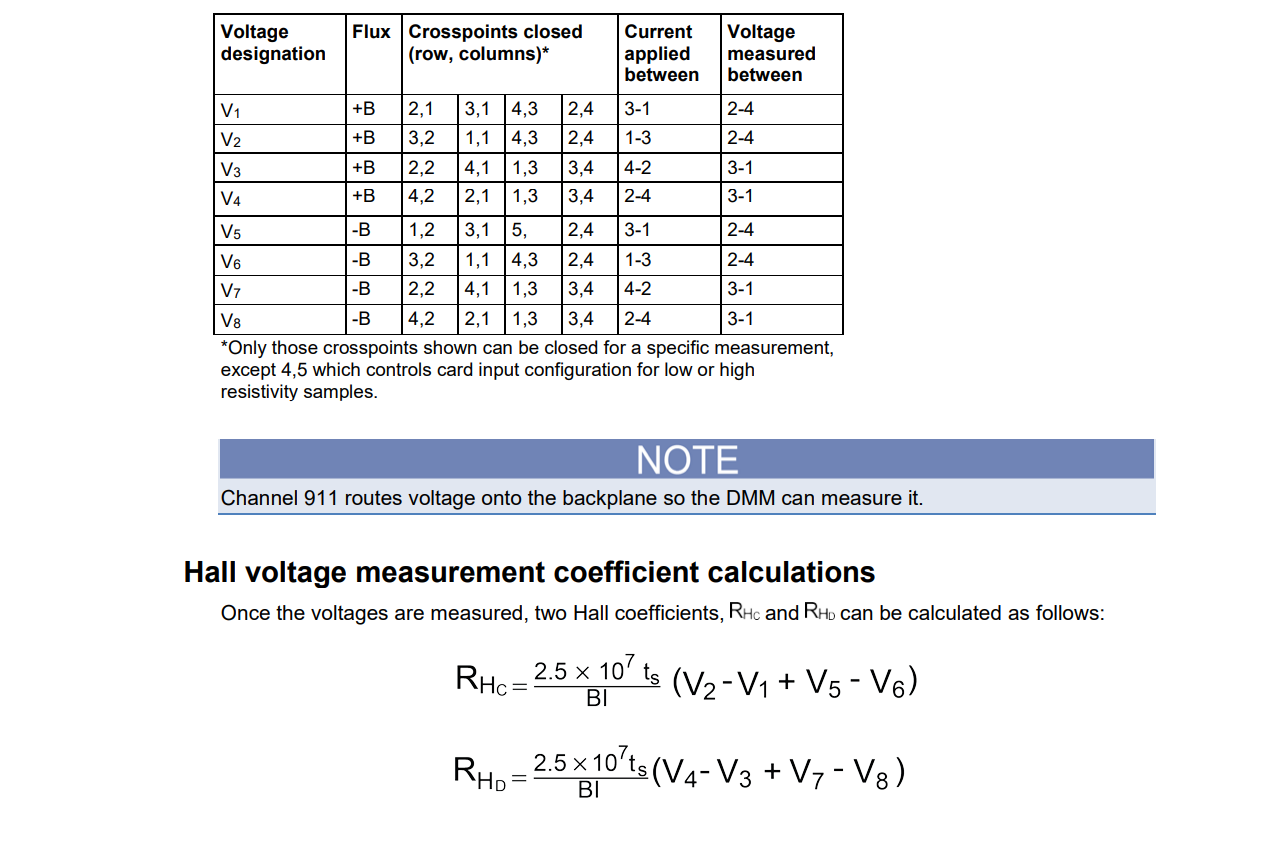

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [256]:
filename='C:\\Users\\Admin\\Desktop\\Data\\20June2023\\MoS2_7_p5_n5_300K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**3
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,0.228587,300.000137,105.315722,-105.130032,-104.985870,105.470584,-0.000997,1000
1,0.000001,2000.352472,300.000569,105.318201,-105.085485,-104.984470,105.465531,-0.000956,1000
2,0.000001,4000.527820,300.000440,105.315309,-105.137041,-104.931486,105.443236,-0.000965,1000
3,0.000001,6000.232129,300.001428,105.280201,-105.110613,-105.026252,105.420269,-0.000966,1000
4,0.000001,8000.285059,300.000945,105.310351,-105.075681,-104.968960,105.495366,-0.001014,1000
...,...,...,...,...,...,...,...,...,...
123,0.000001,42000.603320,300.000368,105.137897,-104.882339,-104.767543,105.285146,-0.001035,1000
124,0.000001,44000.383010,300.000522,105.141850,-104.887935,-104.660703,105.276622,-0.001014,1000
125,0.000001,46000.236130,300.000530,105.125592,-104.902904,-104.728093,105.275914,-0.001013,1000
126,0.000001,48000.326370,300.000383,105.140111,-104.883072,-104.737629,105.300699,-0.000994,1000


In [257]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

In [258]:
# (df['V3'], df['V4']) = (df['V4'], df['V3'])

### Converting B to integer B

In [259]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [260]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,0.228587,0,300.000137,-105.315722,105.130032,104.985870,-105.470584,-0.000997,1000
1,0.000001,2000.352472,2000,300.000569,-105.318201,105.085485,104.984470,-105.465531,-0.000956,1000
2,0.000001,4000.527820,4000,300.000440,-105.315309,105.137041,104.931486,-105.443236,-0.000965,1000
3,0.000001,6000.232129,6000,300.001428,-105.280201,105.110613,105.026252,-105.420269,-0.000966,1000
4,0.000001,8000.285059,8000,300.000945,-105.310351,105.075681,104.968960,-105.495366,-0.001014,1000


In [261]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

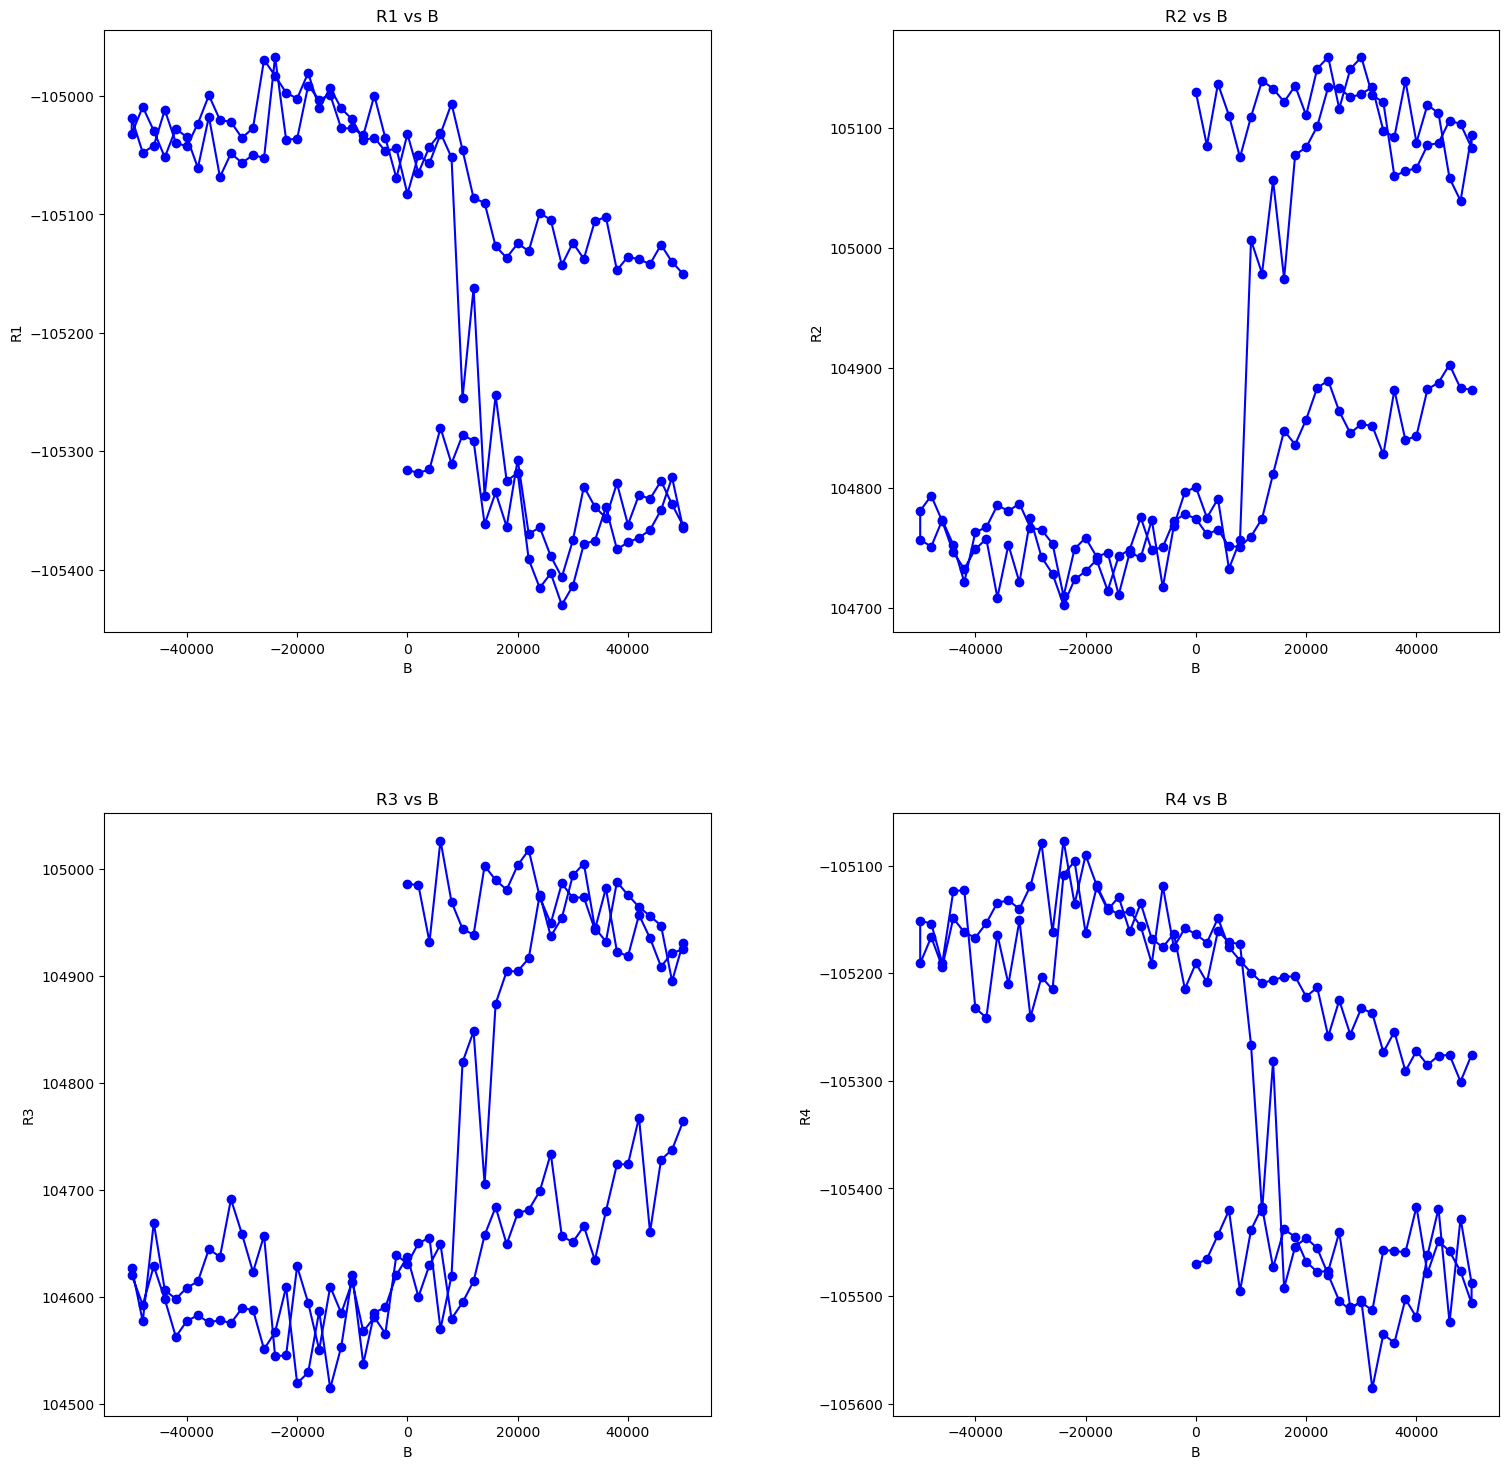

In [262]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [263]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

25

In [264]:
df = df.iloc[B_max_first_idx+1:].copy()
df.reset_index(inplace = True, drop = True) # resetting index

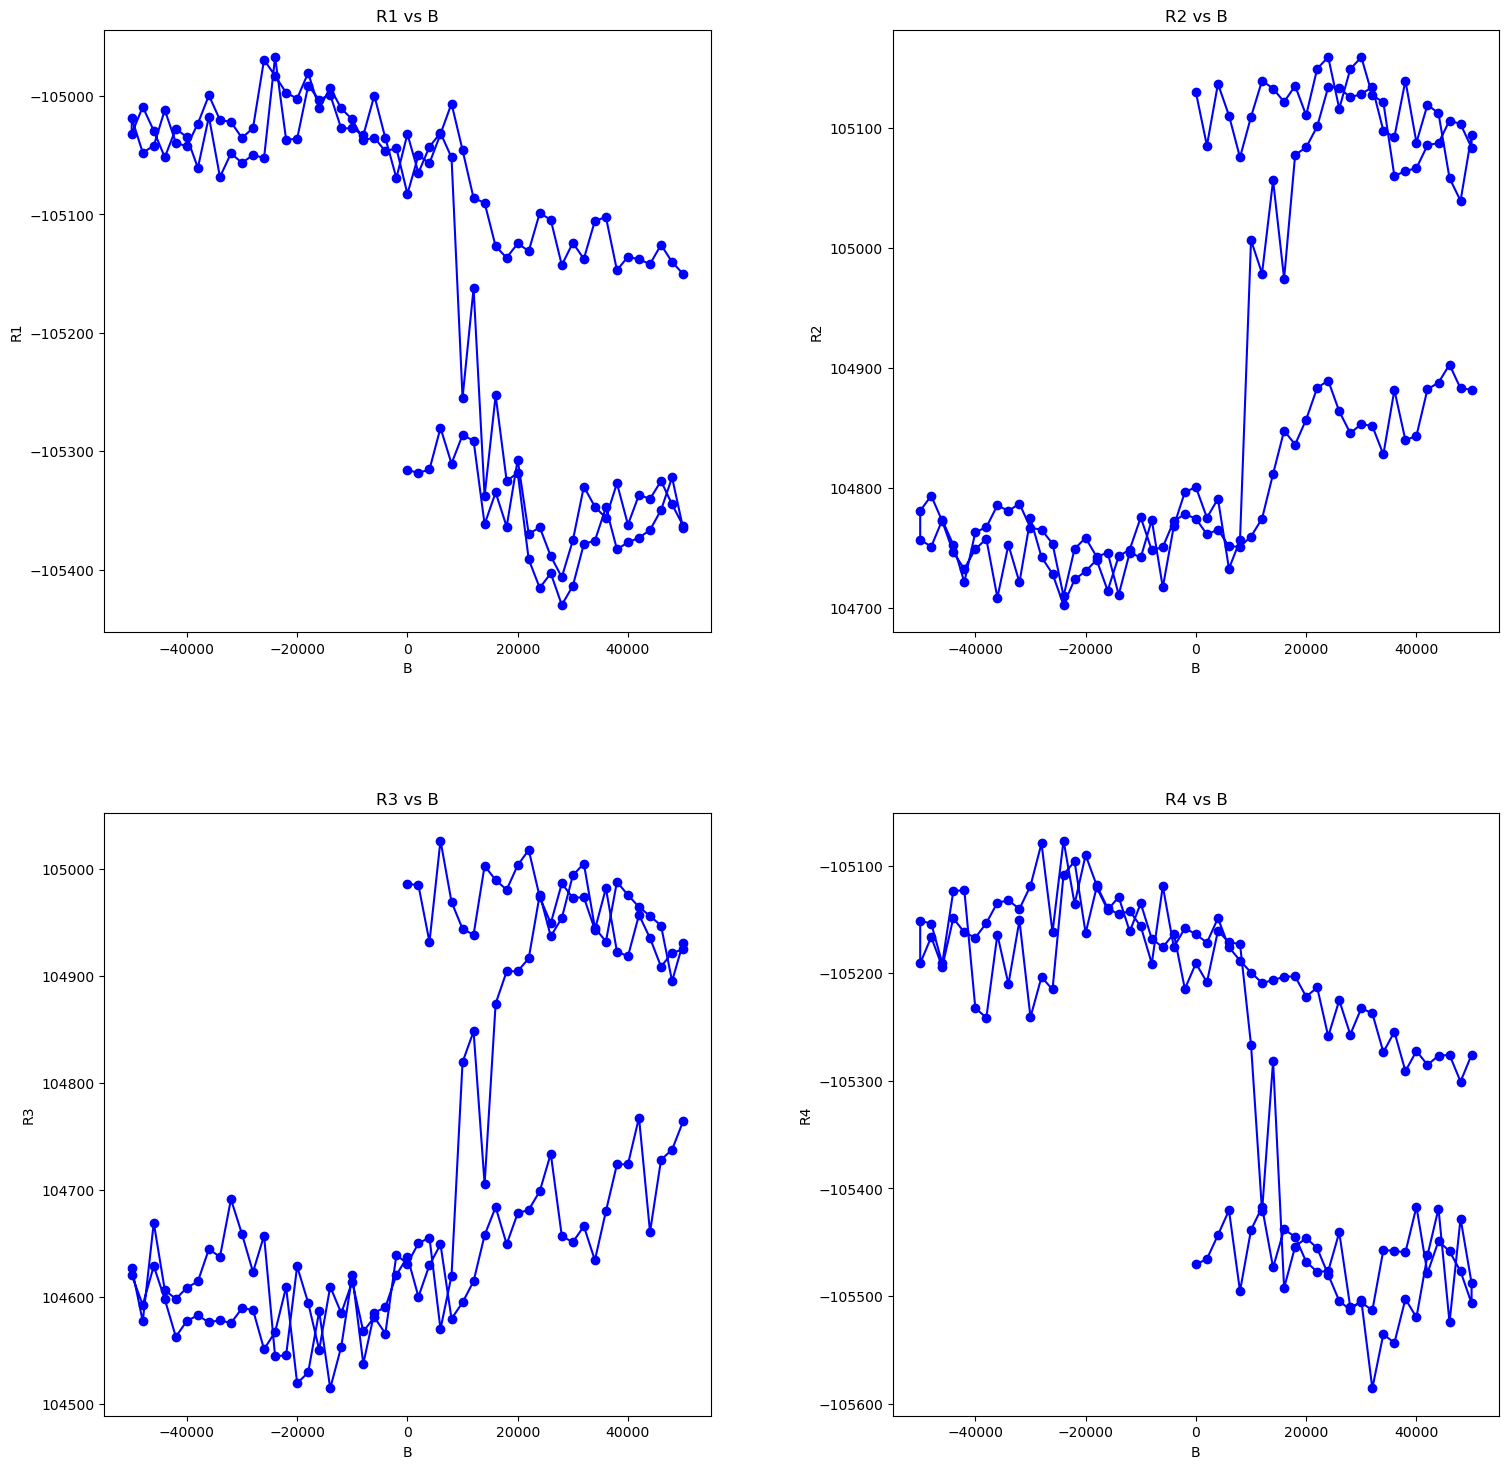

In [265]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [266]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [267]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

50

In [268]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [269]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,50000.41074,50000,300.000505,-105.364874,105.094067,104.930745,-105.487895,-0.001038,1000
1,0.000001,48000.34355,48000,300.000130,-105.321992,105.039566,104.894952,-105.427961,-0.000965,1000
2,0.000001,46000.55684,46000,300.000505,-105.349546,105.058375,104.946763,-105.524490,-0.001009,1000
3,0.000001,44000.33008,44000,299.999448,-105.366390,105.112484,104.955792,-105.418731,-0.000991,1000
4,0.000001,42000.22168,42000,300.000151,-105.372960,105.119614,104.964176,-105.462182,-0.000986,1000


In [270]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
51,0.000001,-50000.14648,-50000,300.000252,-105.018501,104.781079,104.620513,-105.190854,-0.001005,1000
52,0.000001,-48000.47656,-48000,300.000089,-105.047832,104.793609,104.592542,-105.166320,-0.001014,1000
53,0.000001,-46000.38477,-46000,300.000098,-105.041933,104.772390,104.628899,-105.194177,-0.001022,1000
54,0.000001,-44000.48320,-44000,300.001054,-105.011723,104.746342,104.597865,-105.148875,-0.000987,1000
55,0.000001,-42000.30273,-42000,299.999985,-105.039311,104.732589,104.562819,-105.162013,-0.001019,1000


In [271]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [272]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,50000,300.000505,-105.364874,105.094067,104.930745,-105.487895,-105.018501,104.781079,104.620513,-105.190854,1000
1,0.000001,48000,300.000130,-105.321992,105.039566,104.894952,-105.427961,-105.047832,104.793609,104.592542,-105.166320,1000
2,0.000001,46000,300.000505,-105.349546,105.058375,104.946763,-105.524490,-105.041933,104.772390,104.628899,-105.194177,1000
3,0.000001,44000,299.999448,-105.366390,105.112484,104.955792,-105.418731,-105.011723,104.746342,104.597865,-105.148875,1000
4,0.000001,42000,300.000151,-105.372960,105.119614,104.964176,-105.462182,-105.039311,104.732589,104.562819,-105.162013,1000


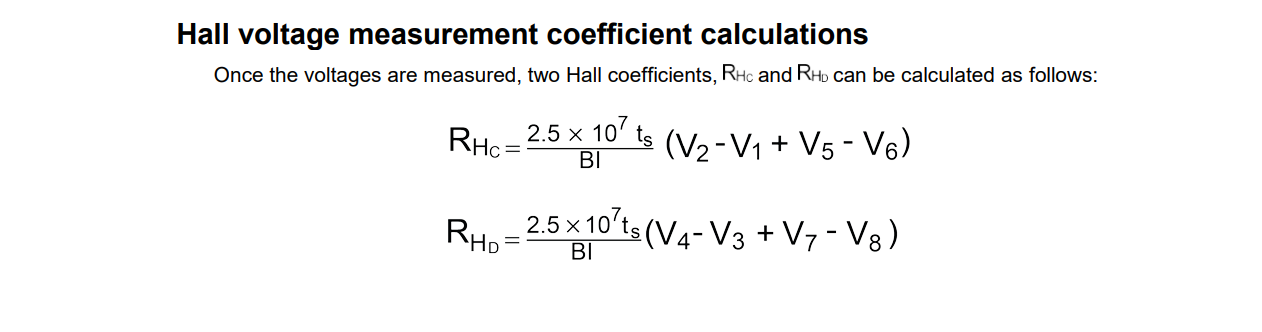
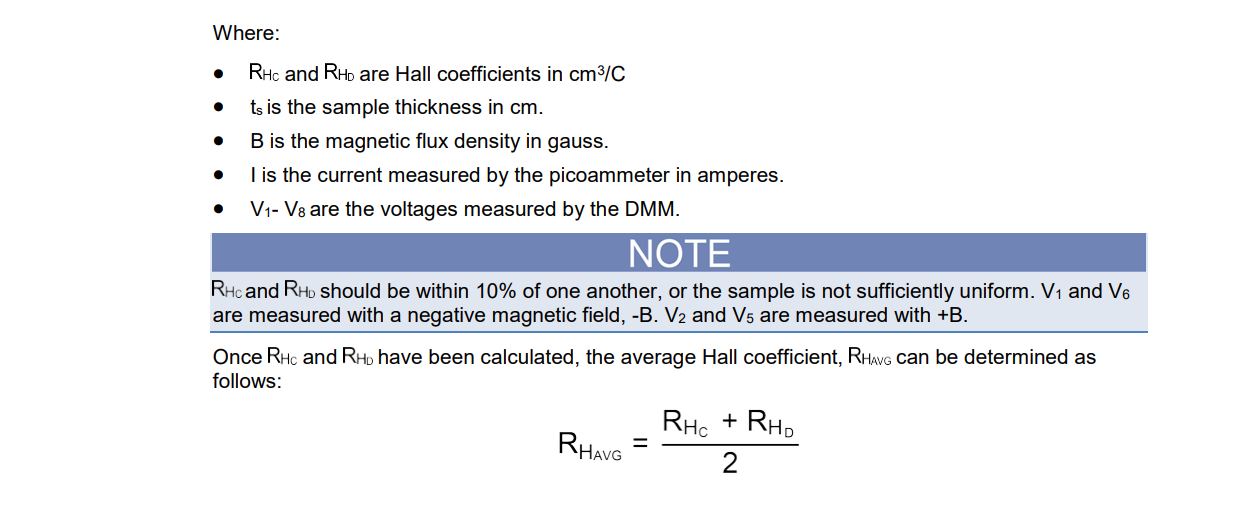

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [273]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

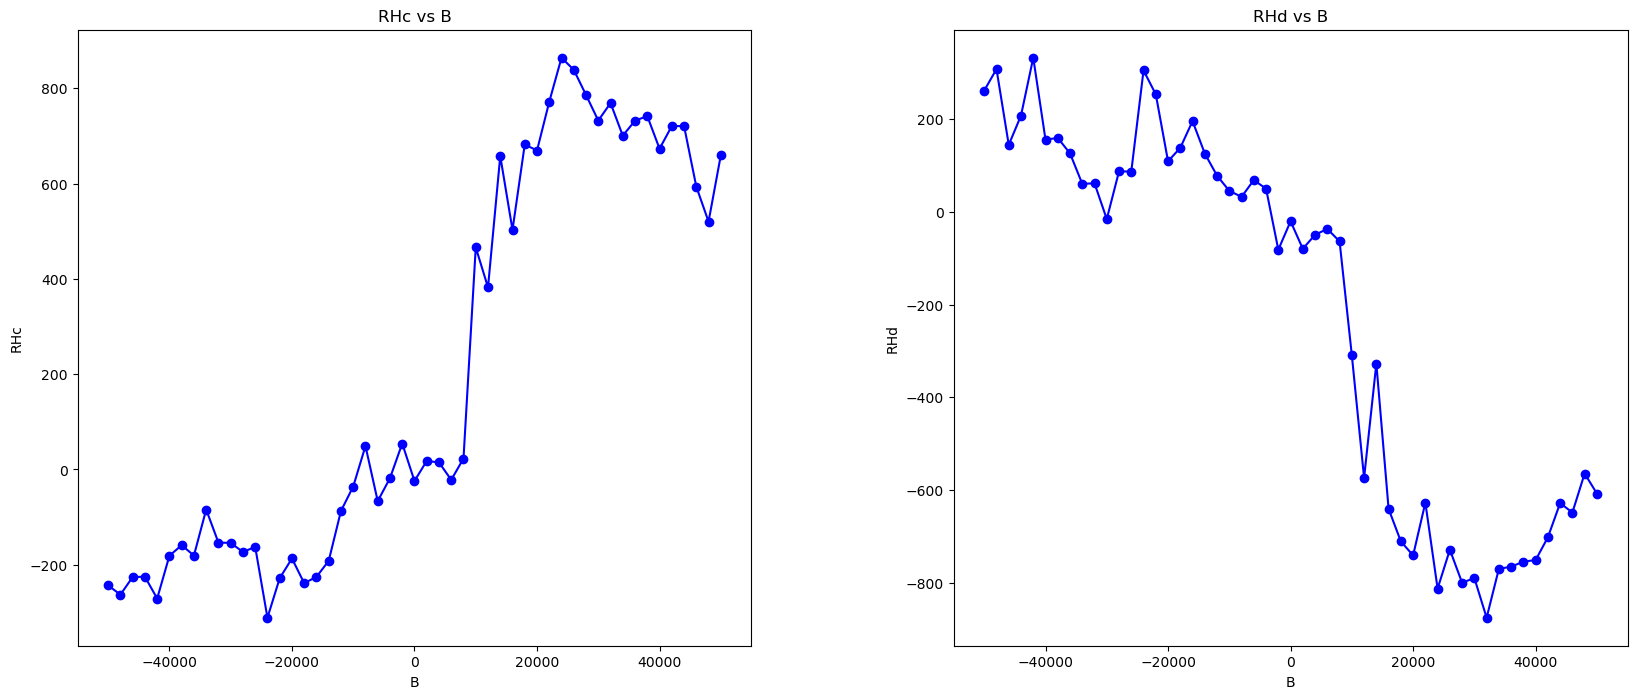

In [274]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

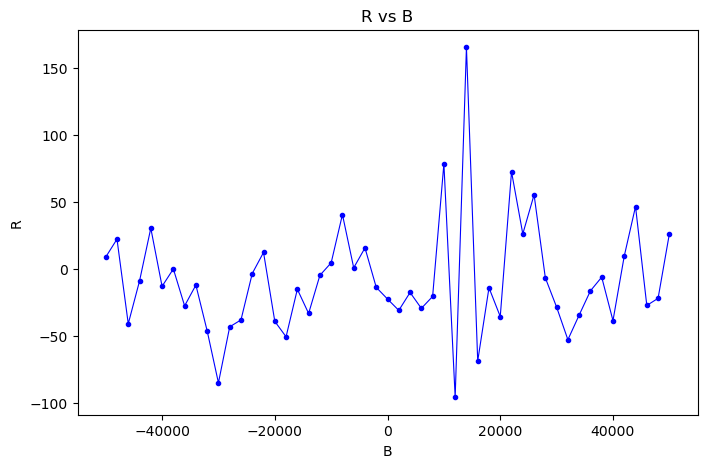

In [275]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [276]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-50000,300.000252,-105.018501,104.781079,104.620513,-105.190854,-105.364874,105.094067,104.930745,-105.487895,1000
1,0.000001,-48000,300.000089,-105.047832,104.793609,104.592542,-105.166320,-105.321992,105.039566,104.894952,-105.427961,1000
2,0.000001,-46000,300.000098,-105.041933,104.772390,104.628899,-105.194177,-105.349546,105.058375,104.946763,-105.524490,1000
3,0.000001,-44000,300.001054,-105.011723,104.746342,104.597865,-105.148875,-105.366390,105.112484,104.955792,-105.418731,1000
4,0.000001,-42000,299.999985,-105.039311,104.732589,104.562819,-105.162013,-105.372960,105.119614,104.964176,-105.462182,1000


### Hall resistance calculation

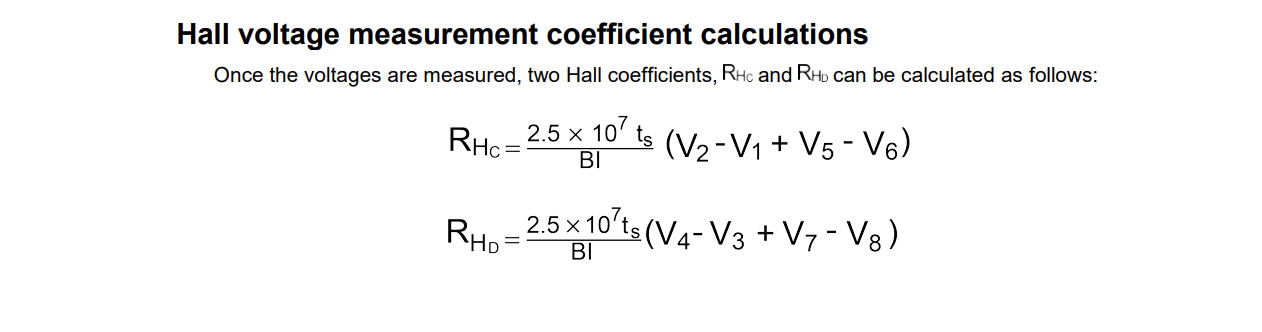

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [277]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

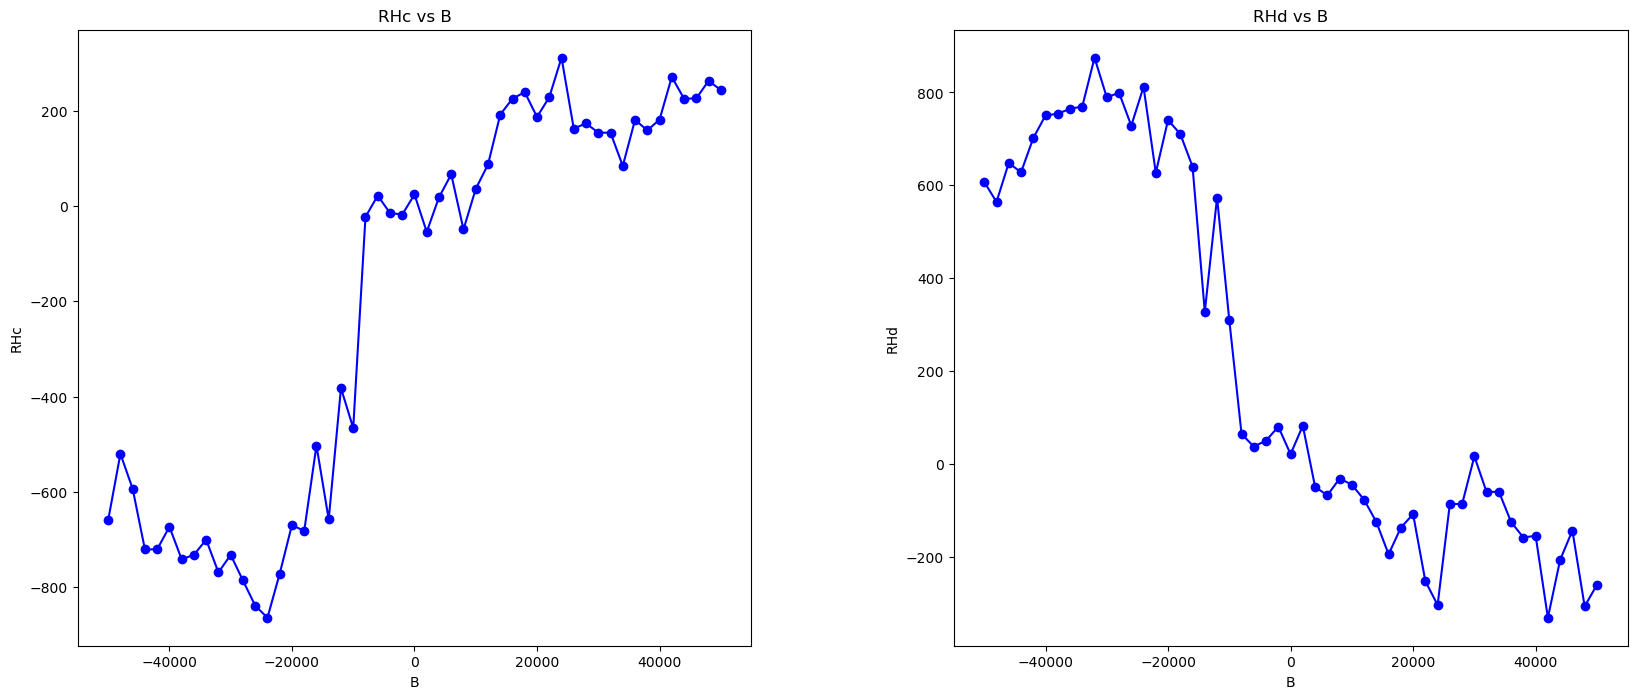

In [278]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

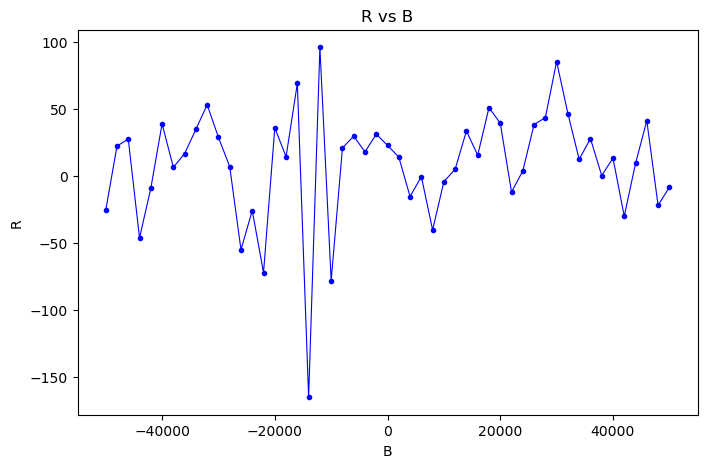

In [279]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

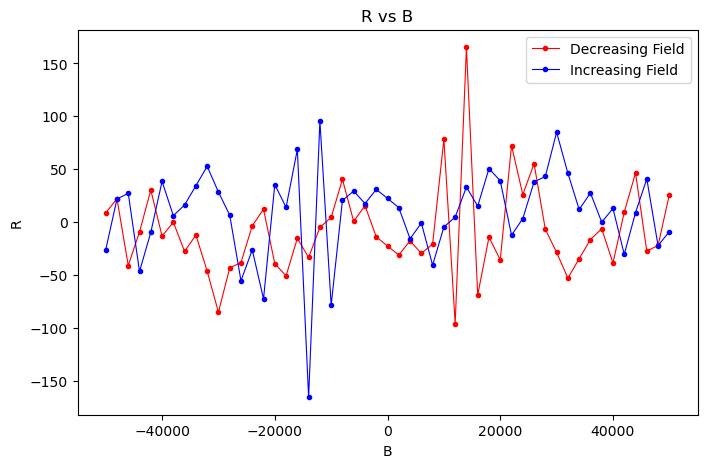

In [280]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()